<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загружаем-библиотеки" data-toc-modified-id="Загружаем-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загружаем библиотеки</a></span></li><li><span><a href="#Загружаем-датасет" data-toc-modified-id="Загружаем-датасет-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загружаем датасет</a></span></li><li><span><a href="#Лемматизируем-текст:" data-toc-modified-id="Лемматизируем-текст:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Лемматизируем текст:</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>TF-IDF</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия-с-параметром-class_weight-=-'balanced'" data-toc-modified-id="Логистическая-регрессия-с-параметром-class_weight-=-'balanced'-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия с параметром class_weight = 'balanced'</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Построим-для-созданной-модели-метрику-AUC-ROC¶" data-toc-modified-id="Построим-для-созданной-модели-метрику-AUC-ROC¶-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Построим для созданной модели метрику AUC-ROC¶</a></span></li></ul></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Отчет</a></span><ul class="toc-item"><li><span><a href="#Особенности-исходных-данных:" data-toc-modified-id="Особенности-исходных-данных:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Особенности исходных данных:</a></span></li><li><span><a href="#Подготовка-исходных-данных-перед-обучением-модели" data-toc-modified-id="Подготовка-исходных-данных-перед-обучением-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка исходных данных перед обучением модели</a></span></li><li><span><a href="#Архитектура-модели" data-toc-modified-id="Архитектура-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Архитектура модели</a></span></li><li><span><a href="#Итоговая-метрика" data-toc-modified-id="Итоговая-метрика-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Итоговая метрика</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

**Заказчик:** Интернет-магазин «Викишоп» 

**Задача проекта:** магазин запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Необходимо обучить модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

**Описание данных**
Заказчиком предоставлен набор данных в формате csv с разметкой о токсичности правок.

 **text** в нём содержит текст комментария   
 **toxic** — целевой признак

**Критерий качества модели:**  

Значение метрики качества *F1* не менее 0.75.

## Подготовка

### Загружаем библиотеки

In [1]:
import pandas as pd
import re
import nltk
nltk.download('wordnet')
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Загружаем датасет

In [2]:
df_tweet = pd.read_csv('/datasets/toxic_comments.csv')

In [3]:
df_tweet.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


В датасете представлены 159292 комментария, размеченных по токсичности. Тип данных соответствует представляемой информации.

комментарии на английском языке и есть столбец Unnamed: 0 неясного назначения

In [5]:
df_tweet['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 159448, 159449, 159450])

Какая-то непоследовательная нумерация строк

In [6]:
df_tweet.shape

(159292, 3)

In [7]:
df_tweet.duplicated().sum()

0

Уберем из текста посторонние символы:

In [8]:
def clear_text(text):
    re.sub(r"[^a-zA-Z' ]",' ',text)
    clear_text = " ".join(re.sub(r"[^a-zA-Z' ]",' ',text).split())
    return clear_text

In [9]:
df_tweet['clear_text'] = (df_tweet['text'].str.lower()).apply(clear_text)

In [10]:
df_tweet.head(3)

,Unnamed: 0,text,toxic,clear_text
0,0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,1,D'aww! He matches this background colour I'm s...,0,d'aww he matches this background colour i'm se...
2,2,"Hey man, I'm really not trying to edit war. It...",0,hey man i'm really not trying to edit war it's...


### Лемматизируем текст:

In [11]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [12]:
lemmatizer = WordNetLemmatizer()


In [13]:
def lemmatize(text):
    word_list = nltk.word_tokenize(text)
    lemm_text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list])  
    return lemm_text

In [14]:
tqdm.pandas()
df_tweet['lemm_text'] = df_tweet['clear_text'].apply(lemmatize)

In [15]:
display(df_tweet.head(2))

,Unnamed: 0,text,toxic,clear_text,lemm_text
0,0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation why the edits make under my userna...
1,1,D'aww! He matches this background colour I'm s...,0,d'aww he matches this background colour i'm se...,d'aww he match this background colour i 'm see...


Теперь выделим features и target:

In [16]:
features = df_tweet['lemm_text']
target = df_tweet['toxic']

In [17]:
corpus, corpus_test, target, target_test = train_test_split(features,target, test_size=0.1, random_state = 12345)

In [18]:
print(corpus.shape)
print(target.shape)
print(corpus_test.shape)
print(target_test.shape)

(143362,)
(143362,)
(15930,)
(15930,)


### TF-IDF

In [20]:
count_tf_idf = TfidfVectorizer() 
tf_idf = count_tf_idf.fit_transform(corpus) 
print("Размер матрицы tf-idf:", tf_idf.shape)

Размер матрицы tf-idf: (143362, 143008)


In [21]:
tf_idf_test = count_tf_idf.transform(corpus_test) 
print("Размер матрицы tf-idf_test:", tf_idf_test.shape)

Размер матрицы tf-idf_test: (15930, 143008)


## Обучение

Соотношение классов в обучающей и тестовой выборке:

In [22]:
target.value_counts()

0    128788
1     14574
Name: toxic, dtype: int64

In [23]:
target_test.value_counts()

0    14318
1     1612
Name: toxic, dtype: int64

В данных явно доминируют позитивные твиттерасты

### Логистическая регрессия с параметром class_weight = 'balanced'

In [35]:
model_lr = LogisticRegression(random_state=12345,class_weight = 'balanced',C = 5)
scores =cross_val_score(model_lr,tf_idf,target,cv=3,scoring = 'f1')
print(scores.mean())

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.7686723512847102


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print(scores.mean())

0.7686723512847102


### Случайный лес

In [26]:
#model_rf = RandomForestClassifier (random_state=12345)
#scores =cross_val_score(model_rf,tf_idf,target,cv=3,scoring = 'f1')
#print(scores.mean())

Считался лес больше 30 минут,не рискнула подбирать параметры. Закоментировала, чтобы не ел время. Метрика F1 при параметрах "по-умолчанию" составила:0.680792

### Catboost

In [27]:
model_cb = CatBoostClassifier(iterations = 200, 
                              learning_rate = 0.5, eval_metric = 'F1', verbose = 20, random_state = 12345)
scores =cross_val_score(model_cb,tf_idf,target,cv=3,scoring = 'f1')
print(scores)

0:	learn: 0.4405188	total: 2.26s	remaining: 7m 30s
20:	learn: 0.7029154	total: 35.9s	remaining: 5m 5s
40:	learn: 0.7529022	total: 1m 8s	remaining: 4m 25s
60:	learn: 0.7763744	total: 1m 39s	remaining: 3m 47s
80:	learn: 0.7906949	total: 2m 11s	remaining: 3m 13s
100:	learn: 0.7996226	total: 2m 42s	remaining: 2m 39s
120:	learn: 0.8082216	total: 3m 13s	remaining: 2m 6s
140:	learn: 0.8172344	total: 3m 45s	remaining: 1m 34s
160:	learn: 0.8253472	total: 4m 16s	remaining: 1m 2s
180:	learn: 0.8328635	total: 4m 48s	remaining: 30.2s
199:	learn: 0.8382471	total: 5m 17s	remaining: 0us
0:	learn: 0.4502347	total: 2.21s	remaining: 7m 20s
20:	learn: 0.6983963	total: 35.8s	remaining: 5m 5s
40:	learn: 0.7559604	total: 1m 7s	remaining: 4m 21s
60:	learn: 0.7761409	total: 1m 38s	remaining: 3m 43s
80:	learn: 0.7913183	total: 2m 10s	remaining: 3m 11s
100:	learn: 0.8000471	total: 2m 40s	remaining: 2m 37s
120:	learn: 0.8099386	total: 3m 12s	remaining: 2m 5s
140:	learn: 0.8200847	total: 3m 43s	remaining: 1m 33s
1

In [28]:
print(scores.mean())

0.7613927220587394


И здесь метрика подросла до требуемого минимума. Круто!!!Выбираю для тестирования логистическую регрессию, так как она самая быстрая и F1 у нее все-таки выше других.

### Тестирование

In [37]:
model_lr = LogisticRegression(random_state=12345,class_weight = 'balanced',C = 5)

In [38]:
model_lr.fit(tf_idf,target)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=5, class_weight='balanced', random_state=12345)

In [39]:
Y_predict = model_lr.predict(tf_idf_test)
print("F1=",f1_score(target_test,Y_predict))

F1= 0.7755443886097152


### Построим для созданной модели метрику AUC-ROC¶

In [40]:
probabilities_test = model_lr.predict_proba(tf_idf_test)
probabilities_one_test = probabilities_test[:, 1]

In [41]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)


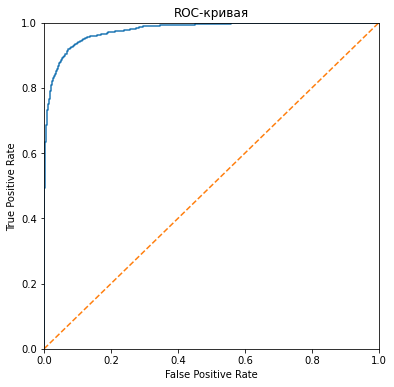

In [42]:
plt.figure(figsize=(6, 6))

plt.plot(fpr, tpr)


plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

## Отчет

**Заказчик:** Интернет-магазин «Викишоп» 

**Задача проекта:** магазин запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Необходимо обучить модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

**Описание данных**
Заказчиком предоставлен набор данных в формате csv с разметкой о токсичности правок.

 **text** в нём содержит текст комментария   
 **toxic** — целевой признак

**Критерий качества модели:**  

Значение метрики качества *F1* не менее 0.75.

### Особенности исходных данных:

1. Заказчиком предоставлен датасет в формате csv, содержащий размеченный текст. Язык текста -английский, комментарии размечены на токсичные и не токсичные;

2. Размер датасета (159292, 3);

3. В тексте присутствуют знаки припинания и буквы различного регистра;

4. Выборка не сбалансирована по классам: доминирует класс позитивных комментов над негативными в соотношении 8.8:1


### Подготовка исходных данных перед обучением модели

Перед обучением модели была проведена токенизация текста с последующей лемматизацией WordNetLemmatizer с POS-тегом.

Сначала была лемматизирована обучающая выборка затем тестовая.

Размер обучающей выборки : (143362,)
Размер тестовой выборки: (15930,)

Признаки получены векторизацией текстов с помощью TF-IDF

### Архитектура модели

Среди всех рассмотренных моделей была выбрана логистическая регрессия с балансировкой классов, так как она показала самую высокую среди всех метрику F1 и самое быстрое время обучения.

**Название модели:**             LogisticRegression    

**Библиотека:**                 scikit-learn   
        
**Тип модели:**                модель классификации   

**Подобранные гиперпараметры:** random_state=12345,class_weight = 'balanced'
                              
**Методика обучения и    
оценки качества модели:**       метод кросс-валидации k-Fold = 5, метрика F1 (условие проекта)
                              


### Итоговая метрика

На логистической регрессии с балансировкой классов и ослабленной регуляризацией метрика F1  составила 0.7686723512847102, на тестовой выборке значение метрики F1 = 0.7755443886097152.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Давай подведем итоги. В целом с проектом ты справляешься - текст предобработан, извлечены признаки и обучены классификаторы. Почти достигнуто требуемое значение метрики f1.
    
Но кое с чем нужно еще поработать. 
    
 - Пожалуста перепиши раздел с лемматизацией. Сейчас она выполняется некорректно.
 - Нужно "дотянуться" до метрики 0,75 на тестовой выборке  

Подсказки я тебе дал, уверен что улучшить метрику у тебя получится.
     
Жду твоих исправлений :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> рекомендации по доп. материалам</b>
Если решишь погрузиться в область работы с текстами, очень советую несколько продвинутых бесплатных курсов.
    
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка. Проходить нужно именно в таком порядке,т.к. почти весь современный NLP построен на нейронках.
    
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  
   - Трек NLP от сообщества ODS https://ods.ai/tracks/nlp-course-autumn-22
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
Спасибо, тема, правда, заинтересовала. Я, по жизни, немного тормоз, люблю сидеть и раскапывать до руды. Но тут не посидишь особо🤪.Проекты у меня примитивные, но советы и замечания от ревьюеров это прямо круть, правда, очень помогает связать разрозненные знания в логическую цепочку! СПАСИБО!
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
Отправляю на повторную проверку. Постаралась все исправить!🙂 Да и отдельная благодарность за оперативную проверку!🥰
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Пожалуйста ))).     
    
Вижу что ты проработала мои комментарии. Теперь проект может быть принят. Поздравляю и желаю дальнейших успехов!

</div>